## <b> Problem Description </b>

### This ML project aims to predict customers who will default on a loan. Banks may experience loss on credit card products from various sources, and one possible reason for the loss is when customers default on their debt, preventing banks from collecting payments for the services rendered.

## **Project Objective:**

The primary goal of this project is to develop a predictive model that identifies which customers are at risk of defaulting on their credit card payments in the upcoming months. This will enable banks to proactively manage risk by identifying potential defaulters early and taking preventive actions to mitigate financial losses.

### Definition of Credit Card Default:

A credit card default occurs when a cardholder fails to meet the required minimum payments for several consecutive months, resulting in severe delinquency. Simply missing one or two payments does not constitute a default. The default happens after prolonged failure to pay the Minimum Amount Due over a period of time, placing the account in a high-risk category.

### Importing  libraries

In [74]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, confusion_matrix,classification_report

from sklearn.svm import SVC


import warnings
warnings.filterwarnings('ignore')

In [75]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [76]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

*ID*: ID of each client

***LIMIT_BAL***: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

SEX: Gender (1 = male, 2 = female)

EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

AGE: Age in years

**Scale for PAY_0 to PAY_6** : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

PAY_0: Repayment status in September, 2005 (scale same as above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In [78]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [79]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000



## Exploratory Data Analysis

<Axes: xlabel='default.payment.next.month', ylabel='count'>

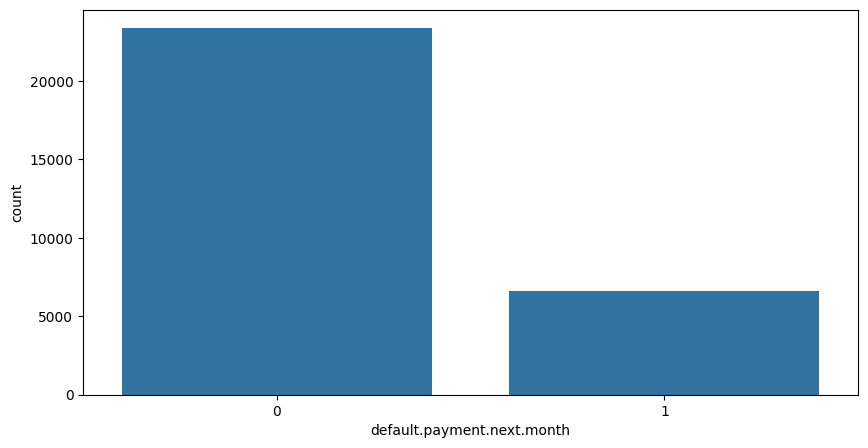

In [80]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'default.payment.next.month', data = df)

In [81]:
df['default.payment.next.month'].value_counts()

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

As we can see from above graph that both classes are not in proportion and we have imbalanced dataset.


<Axes: xlabel='EDUCATION', ylabel='count'>

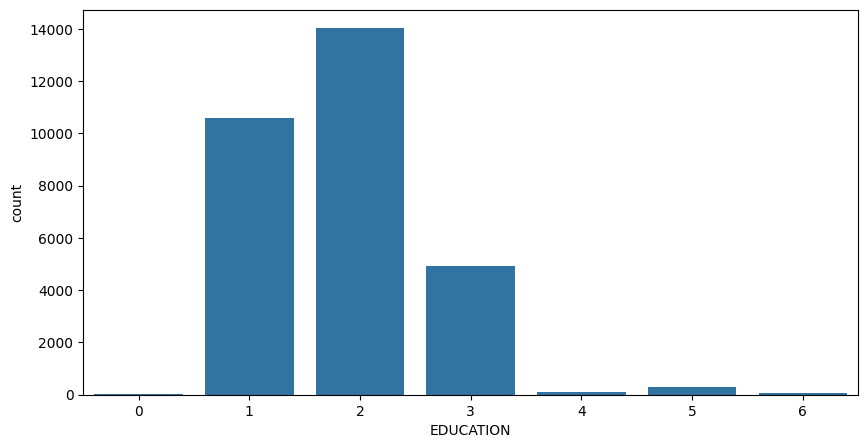

In [82]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'EDUCATION', data = df)

In [83]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

**Education**



> 1 = graduate school, 2 = university, 3 = high school, 4 = others

In [84]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

<Axes: xlabel='EDUCATION', ylabel='count'>

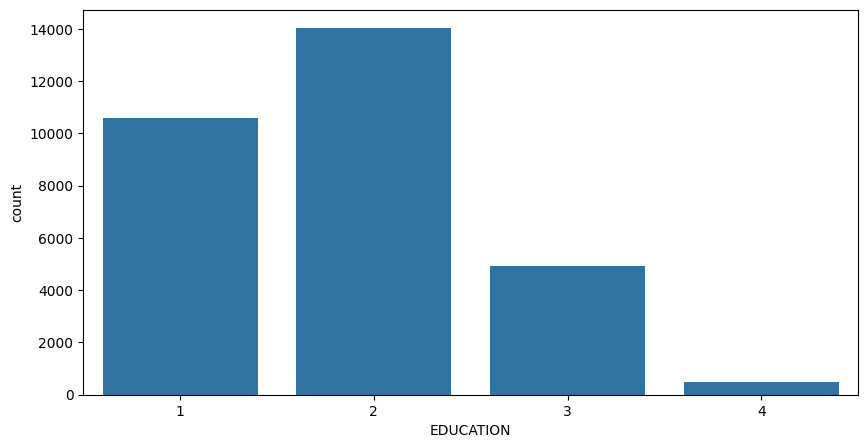

In [85]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'EDUCATION', data = df)

In [86]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [87]:
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

<Axes: xlabel='MARRIAGE', ylabel='count'>

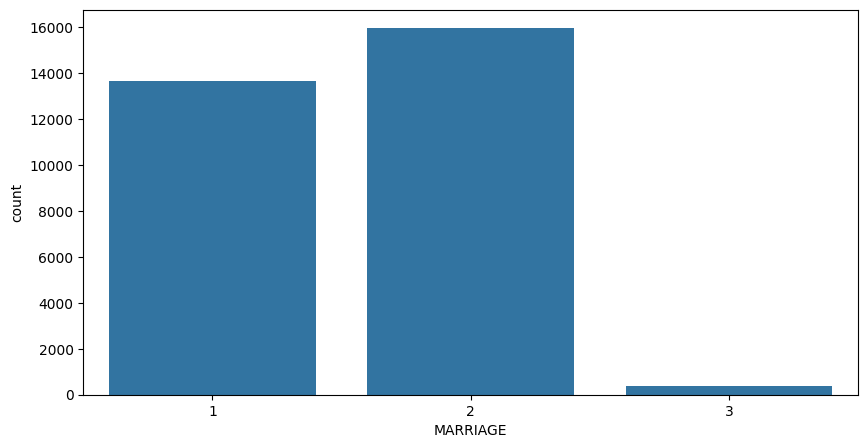

In [88]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'MARRIAGE', data = df)

**Plotting our categorical features**

In [89]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
df_cat = df[categorical_features]
df_cat['Defaulter'] = df['default.payment.next.month']
df_cat

,SEX,EDUCATION,MARRIAGE,Defaulter
0,2,2,1,1
1,2,2,2,1
2,2,2,2,0
3,2,2,1,0
4,1,2,1,0
...,...,...,...,...
29995,1,3,1,0
29996,1,3,2,0
29997,1,2,2,1
29998,1,3,1,1


In [90]:
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [91]:
df_cat

,SEX,EDUCATION,MARRIAGE,Defaulter
0,FEMALE,university,married,1
1,FEMALE,university,single,1
2,FEMALE,university,single,0
3,FEMALE,university,married,0
4,MALE,university,married,0
...,...,...,...,...
29995,MALE,high school,married,0
29996,MALE,high school,single,0
29997,MALE,university,single,1
29998,MALE,high school,married,1


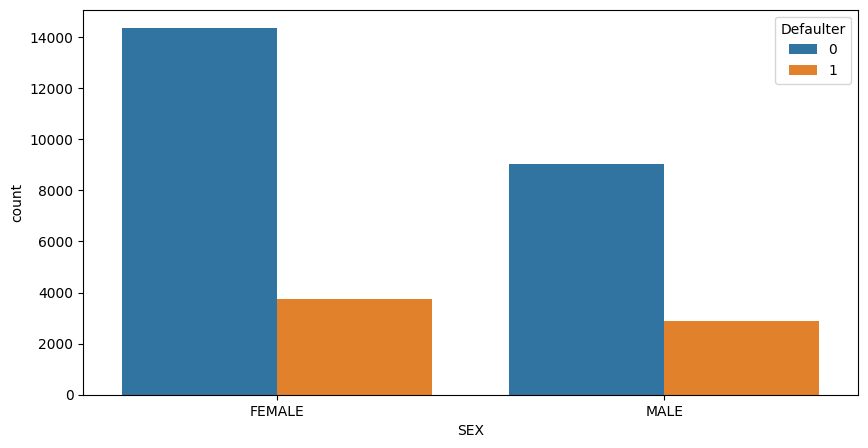

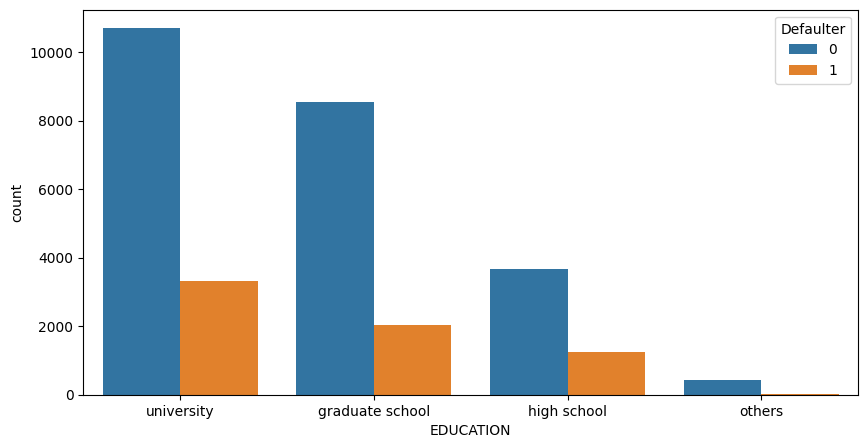

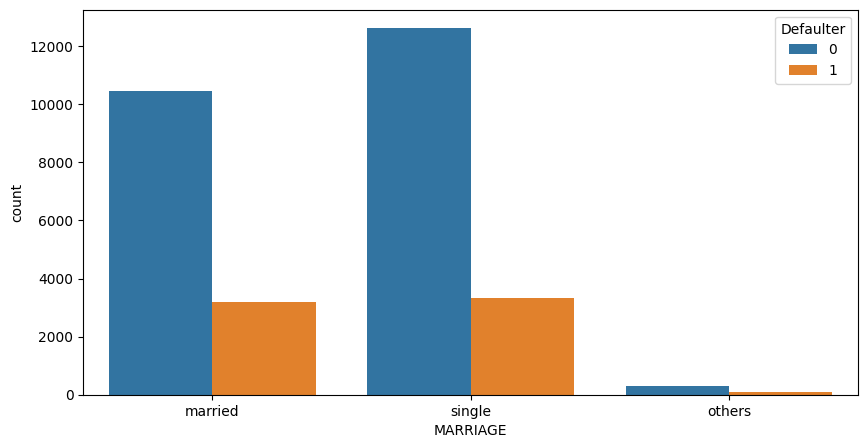

In [92]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

**Limit Balance**

In [93]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

<Axes: xlabel='default.payment.next.month', ylabel='LIMIT_BAL'>

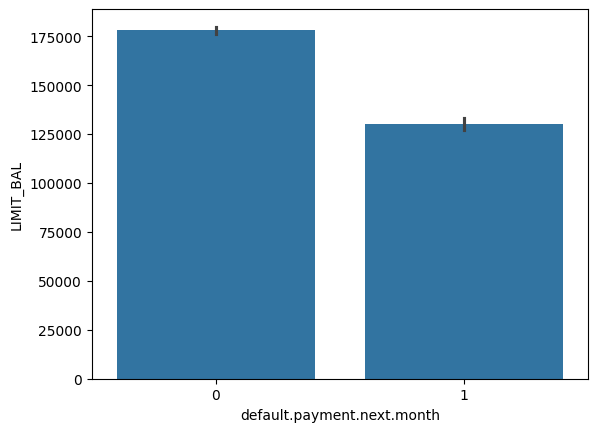

In [94]:
sns.barplot(x='default.payment.next.month', y='LIMIT_BAL', data=df)

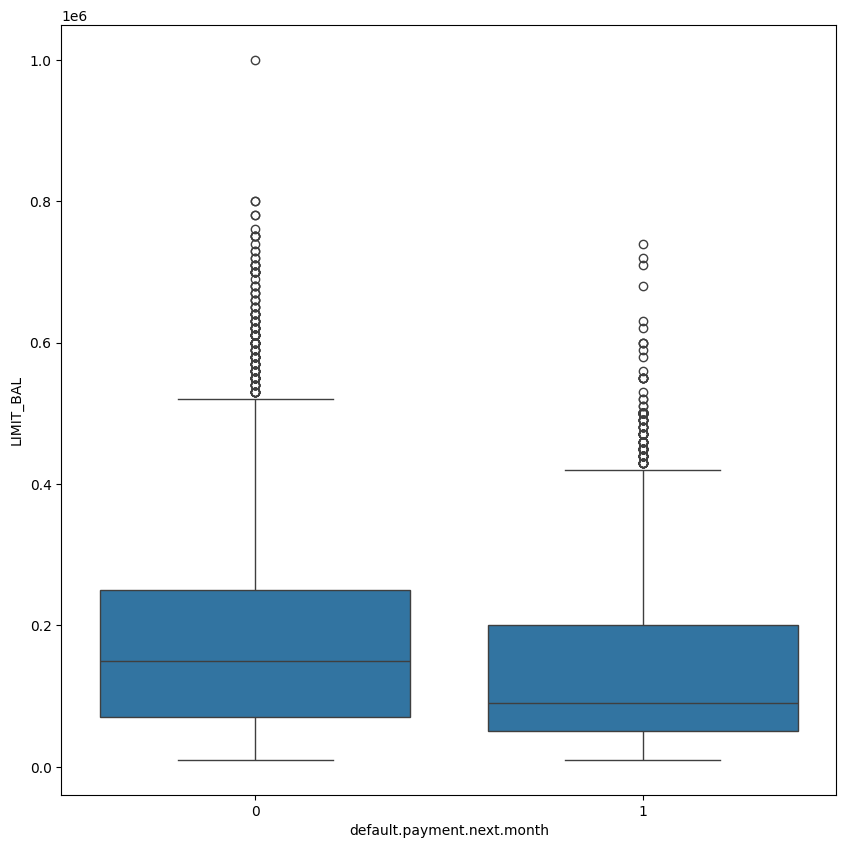

In [95]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="default.payment.next.month", y="LIMIT_BAL", data=df)

In [96]:
#renaming columns

df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

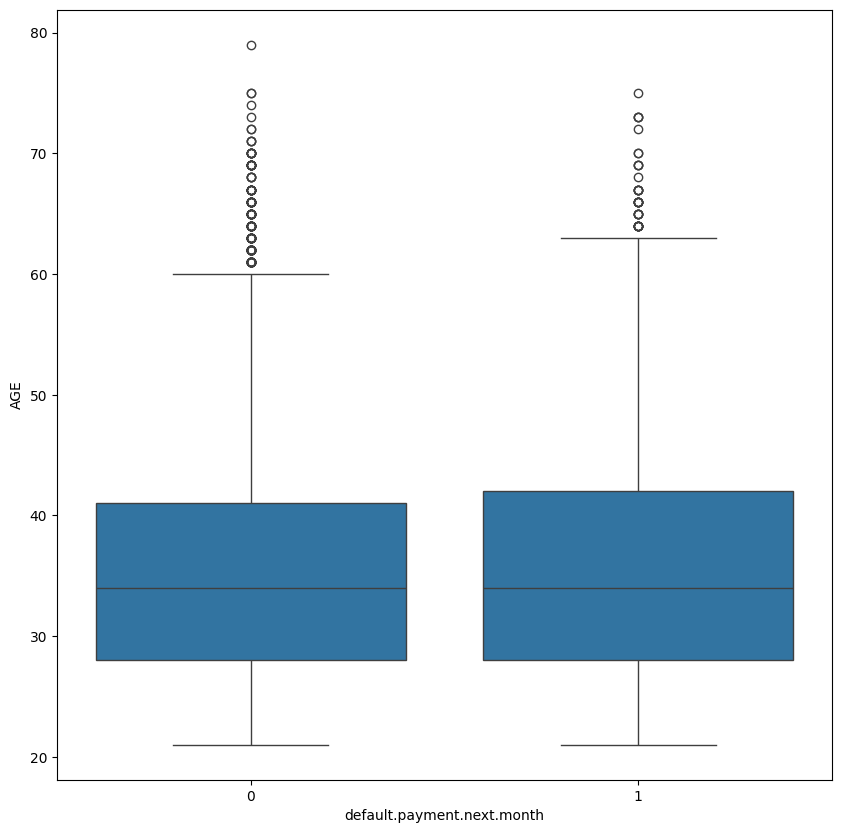

In [97]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="default.payment.next.month", y="AGE", data=df)

**Bill Amount**

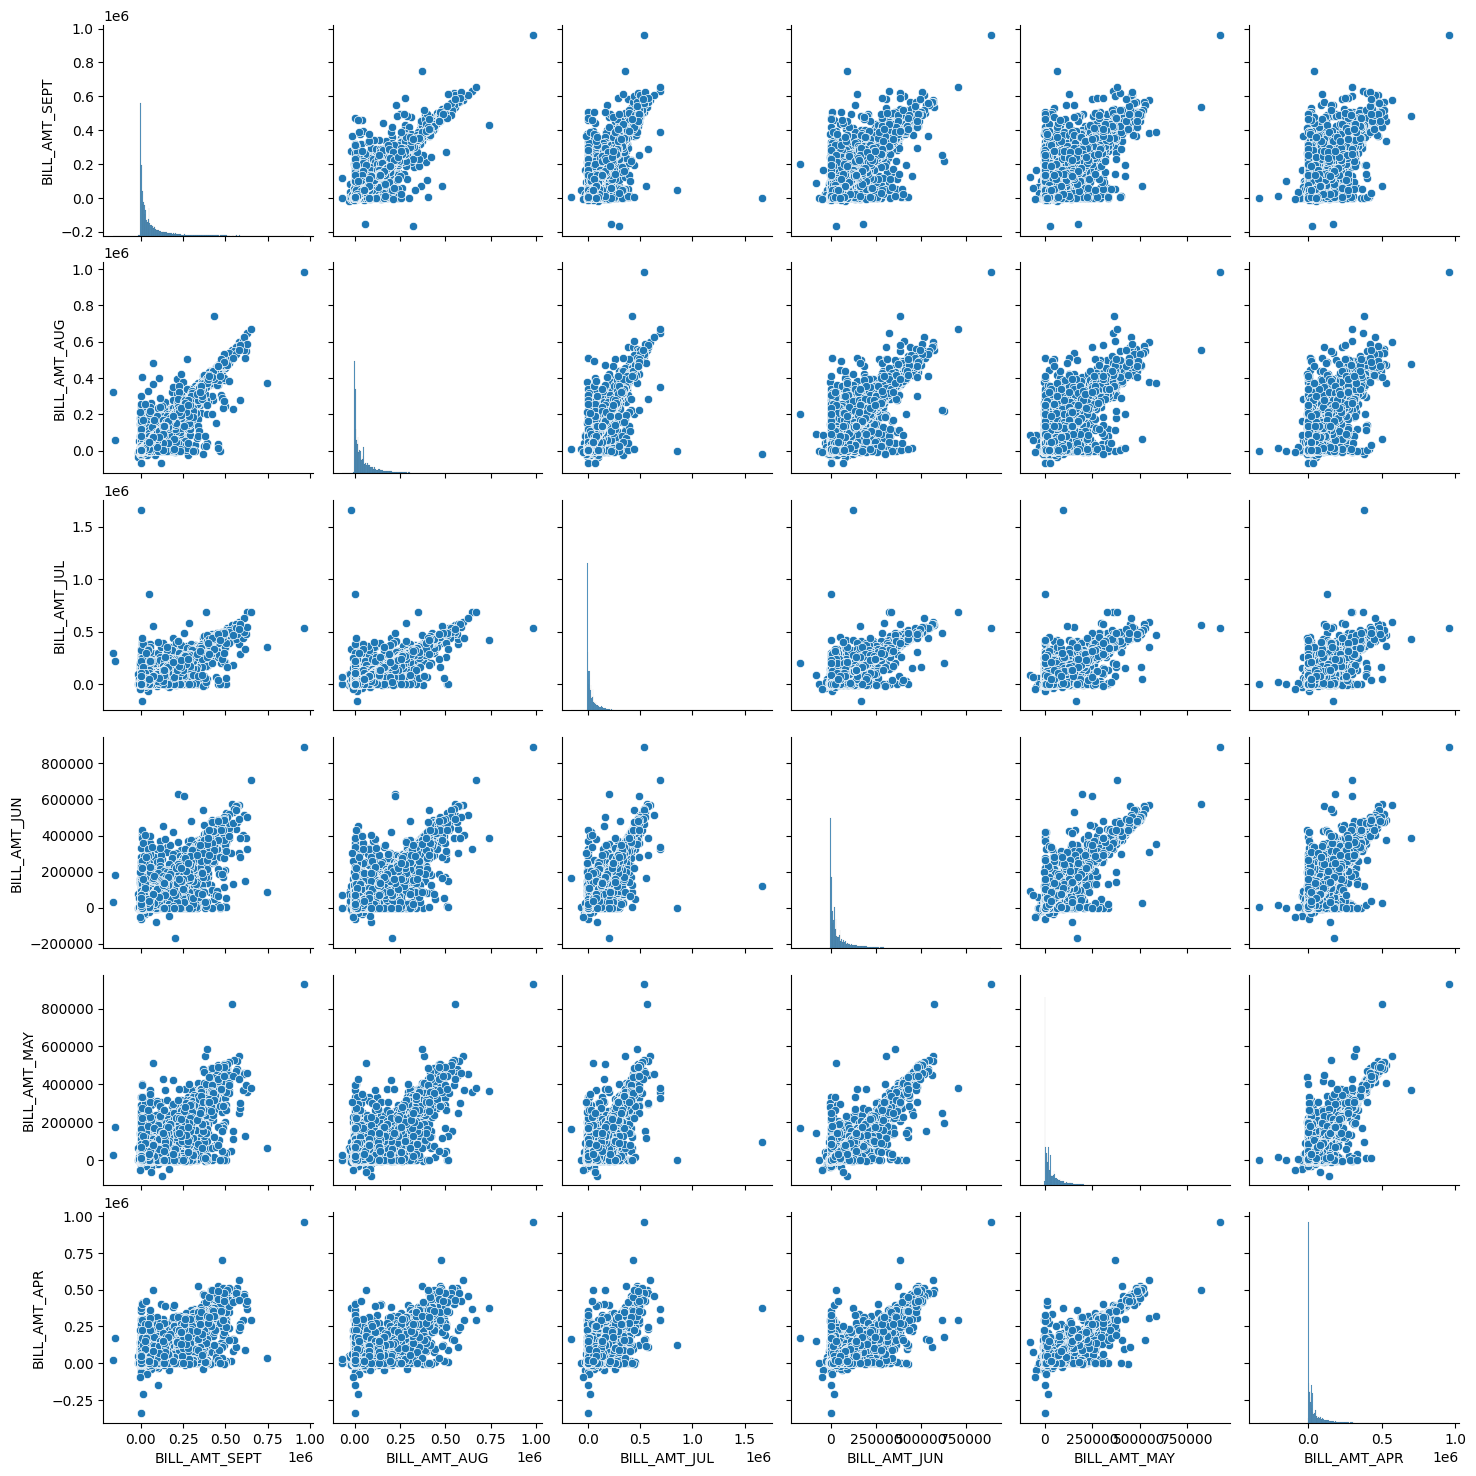

In [98]:
bill_amnt_df = df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]

sns.pairplot(data = bill_amnt_df)

**History payment status**

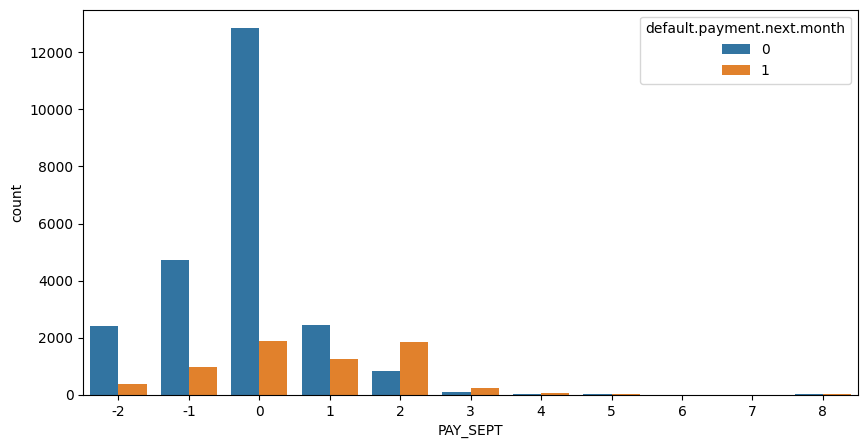

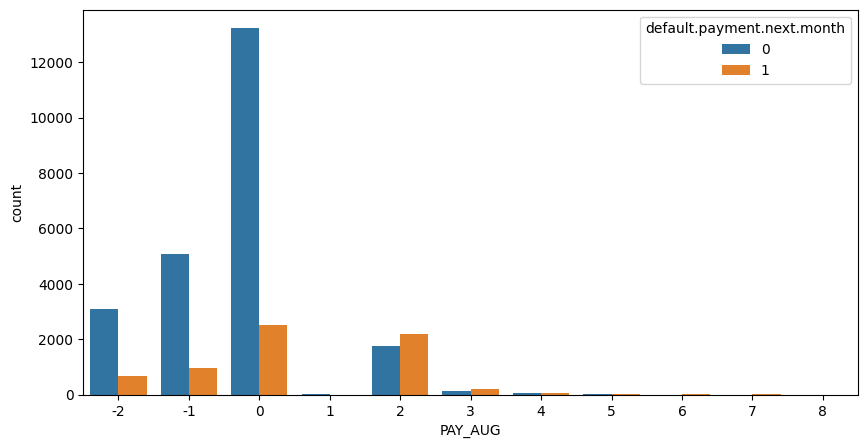

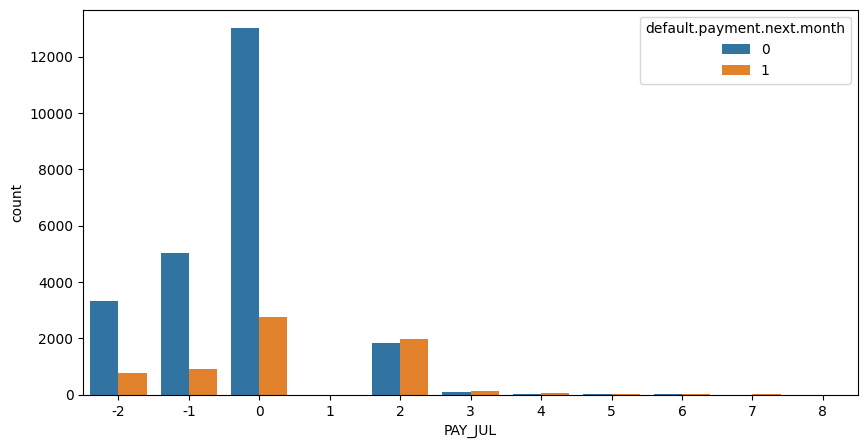

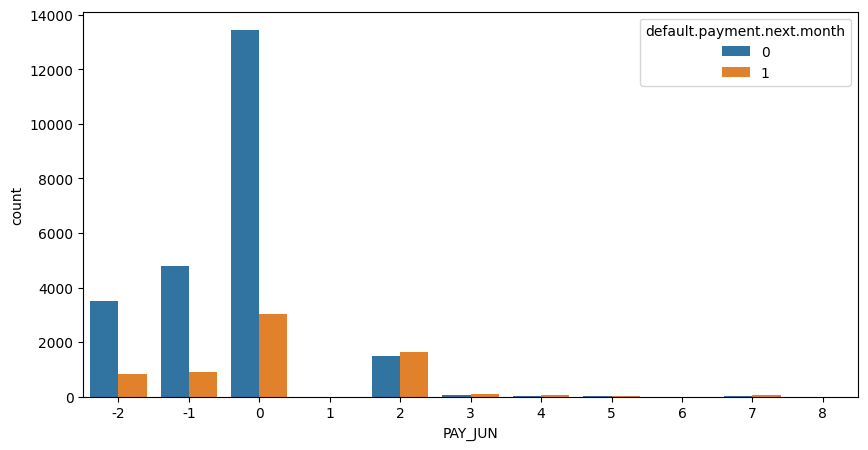

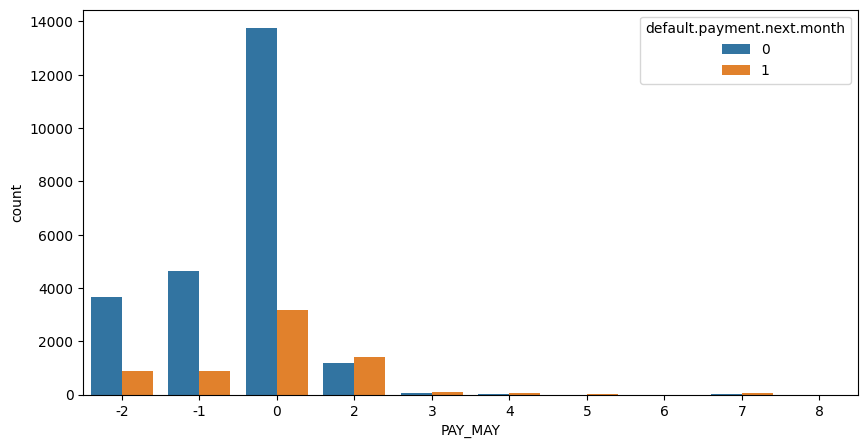

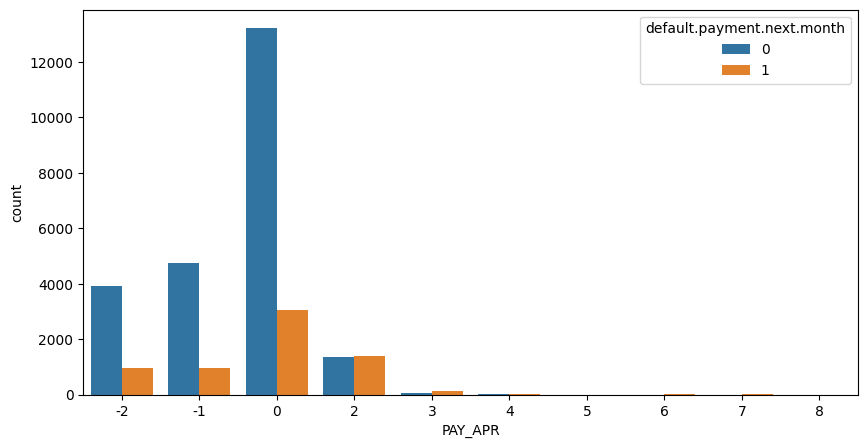

In [99]:
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'default.payment.next.month', data = df)

**Paid Amount**

In [100]:
pay_amnt_df = df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR', 'default.payment.next.month']]
sns.pairplot(data = pay_amnt_df, hue='default.payment.next.month')

Error in callback <function flush_figures at 0x0000017C958E4220> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

## To remediate Imbalance we are using SMOTE(Synthetic Minority Oversampling Technique

In [29]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['default.payment.next.month'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [30]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,1,20000.000000,2,2,1,24,2,2,-1,-1,...,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000
1,2,120000.000000,2,2,2,26,-1,2,0,0,...,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000
2,3,90000.000000,2,2,2,34,0,0,0,0,...,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000
3,4,50000.000000,2,2,1,37,0,0,0,0,...,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000
4,5,50000.000000,1,2,1,57,-1,0,-1,0,...,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,7533,57083.481942,2,1,1,38,2,2,2,2,...,48362.182300,49262.390113,50322.764534,51023.812160,2000.000000,2000.000000,2000.000000,2000.000000,1775.084909,2212.504458
46724,21418,10000.000000,1,2,1,30,0,1,1,1,...,7409.537980,7270.021891,8429.374361,6645.634029,744.649200,2301.109004,743.907518,1451.865054,0.000000,405.744383
46725,9024,171415.808516,1,1,1,41,0,1,0,0,...,66810.638799,51826.017395,35676.763372,35090.430754,2134.501809,2028.316170,2907.349040,2424.742555,4575.257445,2042.474255
46726,5863,100000.000000,1,1,1,52,1,2,2,2,...,25193.738590,24494.299057,29727.025796,31727.315800,0.000000,3821.957696,0.000000,5841.458788,2524.376365,792.706058


In [31]:
columns = list(df.columns)
columns

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_SEPT',
 'PAY_AUG',
 'PAY_JUL',
 'PAY_JUN',
 'PAY_MAY',
 'PAY_APR',
 'BILL_AMT_SEPT',
 'BILL_AMT_AUG',
 'BILL_AMT_JUL',
 'BILL_AMT_JUN',
 'BILL_AMT_MAY',
 'BILL_AMT_APR',
 'PAY_AMT_SEPT',
 'PAY_AMT_AUG',
 'PAY_AMT_JUL',
 'PAY_AMT_JUN',
 'PAY_AMT_MAY',
 'PAY_AMT_APR',
 'default.payment.next.month']

In [32]:
columns.pop()

'default.payment.next.month'

In [33]:
balance_df = pd.DataFrame(x_smote, columns=columns)

In [34]:
balance_df['default.payment.next.month'] = y_smote

<Axes: xlabel='default.payment.next.month', ylabel='count'>

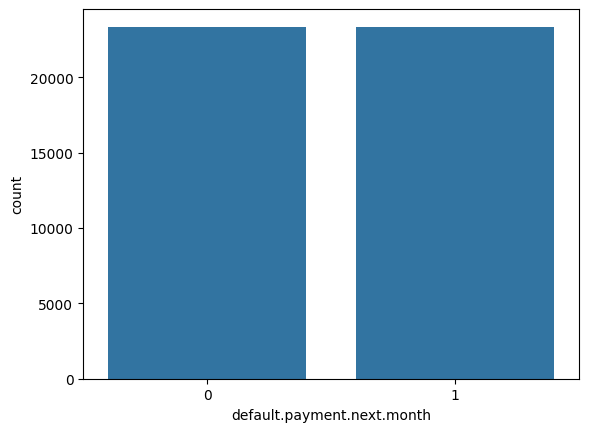

In [35]:
sns.countplot(x = 'default.payment.next.month', data = balance_df)

# Feature Engineering

In [36]:
df_fr = balance_df.copy()

In [37]:
df_fr['Payement_Value'] = df_fr['PAY_SEPT'] + df_fr['PAY_AUG'] + df_fr['PAY_JUL'] + df_fr['PAY_JUN'] + df_fr['PAY_MAY'] + df_fr['PAY_APR']

<Axes: xlabel='default.payment.next.month', ylabel='Payement_Value'>

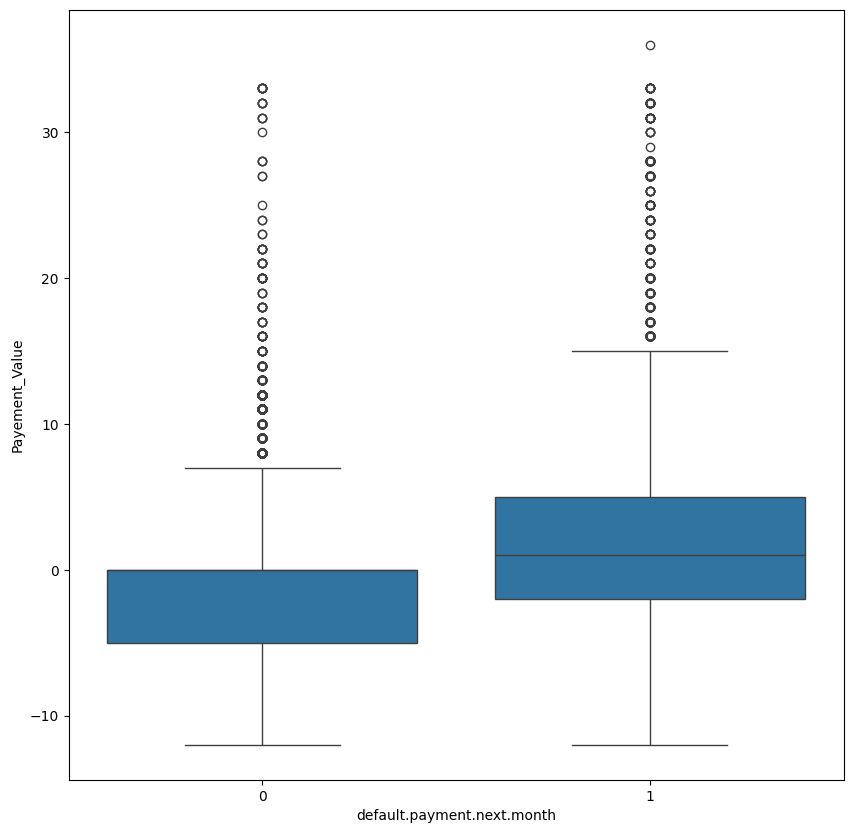

In [38]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df_fr, x = 'default.payment.next.month', y = 'Payement_Value' )

In [39]:
df_fr['Dues'] = (df_fr['BILL_AMT_APR']+df_fr['BILL_AMT_MAY']+df_fr['BILL_AMT_JUN']+df_fr['BILL_AMT_JUL']+df_fr['BILL_AMT_SEPT'])-(df_fr['PAY_AMT_APR']+df_fr['PAY_AMT_MAY']+df_fr['PAY_AMT_JUN']+df_fr['PAY_AMT_JUL']+df_fr['PAY_AMT_AUG']+df_fr['PAY_AMT_SEPT'])

In [40]:
df_fr.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,Payement_Value,Dues
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,-2,3913.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,3,10352.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,76608.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,174713.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,-2,44620.0


In [41]:
df_fr['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

In [42]:
df_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [43]:
df_fr.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,Payement_Value,Dues
0,1,20000.0,FEMALE,university,married,24,2,2,-1,-1,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,-2,3913.0
1,2,120000.0,FEMALE,university,single,26,-1,2,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,3,10352.0
2,3,90000.0,FEMALE,university,single,34,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,76608.0
3,4,50000.0,FEMALE,university,married,37,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,174713.0
4,5,50000.0,MALE,university,married,57,-1,0,-1,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,-2,44620.0


In [44]:
data=df[["LIMIT_BAL","AGE","ID","SEX","EDUCATION","MARRIAGE","default.payment.next.month"]]

<Axes: >

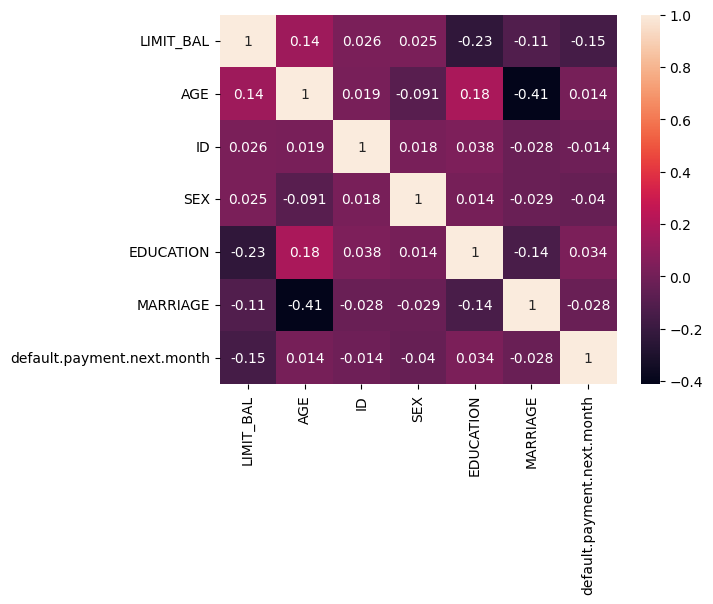

In [45]:
sns.heatmap(data.corr(),annot=True)

# One Hot Encoding

In [46]:
df_fr = pd.get_dummies(df_fr,columns=['EDUCATION','MARRIAGE'])


In [47]:
df_fr.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,default.payment.next.month,Payement_Value,Dues,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,1,20000.0,FEMALE,24,2,2,-1,-1,-2,-2,...,1,-2,3913.0,False,False,False,True,True,False,False
1,2,120000.0,FEMALE,26,-1,2,0,0,0,2,...,1,3,10352.0,False,False,False,True,False,False,True
2,3,90000.0,FEMALE,34,0,0,0,0,0,0,...,0,0,76608.0,False,False,False,True,False,False,True
3,4,50000.0,FEMALE,37,0,0,0,0,0,0,...,0,0,174713.0,False,False,False,True,True,False,False
4,5,50000.0,MALE,57,-1,0,-1,0,0,0,...,0,-2,44620.0,False,False,False,True,True,False,False


In [48]:
df_fr.drop(['EDUCATION_others','MARRIAGE_others'],axis = 1, inplace = True)

In [49]:
df_fr = pd.get_dummies(df_fr, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )

In [50]:
df_fr.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000.0,FEMALE,24,3913.0,3102.0,689.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2,120000.0,FEMALE,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,...,False,False,False,True,False,False,False,False,False,False
2,3,90000.0,FEMALE,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,...,False,True,False,False,False,False,False,False,False,False
3,4,50000.0,FEMALE,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,...,False,True,False,False,False,False,False,False,False,False
4,5,50000.0,MALE,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,...,False,True,False,False,False,False,False,False,False,False


In [51]:
encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
df_fr = df_fr.replace(encoders_nums)

In [52]:
df_fr.drop('ID',axis = 1, inplace = True)

In [53]:
df_fr.to_csv('Final_df.csv')

In [54]:
df_fr = pd.read_csv('Final_df.csv')


In [55]:
df_fr.head()

,Unnamed: 0,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,0,20000.0,0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,120000.0,0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,...,False,False,False,True,False,False,False,False,False,False
2,2,90000.0,0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,...,False,True,False,False,False,False,False,False,False,False
3,3,50000.0,0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,...,False,True,False,False,False,False,False,False,False,False
4,4,50000.0,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,...,False,True,False,False,False,False,False,False,False,False


In [56]:
df_fr.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [57]:
df_fr.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000.0,0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,120000.0,0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,...,False,False,False,True,False,False,False,False,False,False
2,90000.0,0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,...,False,True,False,False,False,False,False,False,False,False
3,50000.0,0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,...,False,True,False,False,False,False,False,False,False,False
4,50000.0,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,...,False,True,False,False,False,False,False,False,False,False


# Logistic Regression

In [58]:
df_log_reg = df_fr.copy()
df_log_reg.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000.0,0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,120000.0,0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,...,False,False,False,True,False,False,False,False,False,False
2,90000.0,0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,...,False,True,False,False,False,False,False,False,False,False
3,50000.0,0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,...,False,True,False,False,False,False,False,False,False,False
4,50000.0,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,...,False,True,False,False,False,False,False,False,False,False


In [59]:
X = df_log_reg.drop(['default.payment.next.month','Payement_Value','Dues'],axis=1)
y = df_log_reg['default.payment.next.month']

In [60]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)


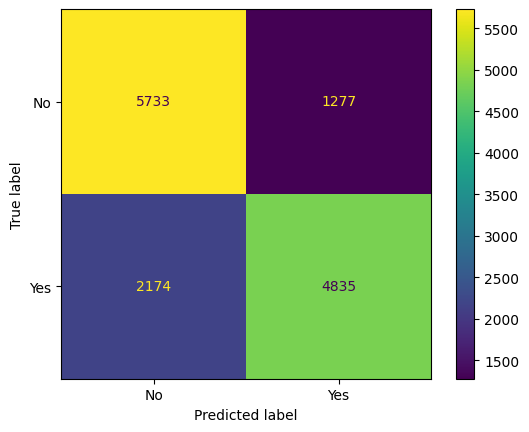

              precision    recall  f1-score   support

           0       0.73      0.82      0.77      7010
           1       0.79      0.69      0.74      7009

    accuracy                           0.75     14019
   macro avg       0.76      0.75      0.75     14019
weighted avg       0.76      0.75      0.75     14019
 
 ##################################################


Train accuracy= 75.42%

Test accuracy= 75.38%


In [65]:
from sklearn import metrics
# log_reg = LogisticRegression()
# log_reg.fit(X_train, y_train)

# y_pred = log_reg.predict(X_test)
# logsig=LogisticRegression()
# logsig.fit(X_train,y_train)
# y_pred=logsig.predict(X_test)
# report=classification_report(y_test,y_pred)
# confusion=confusion_matrix(y_test,y_pred)
# fig=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion,display_labels=["No","Yes"])
# train_score=logsig.score(X_train,y_train)
# test_score=logsig.score(X_test,y_test)
# fig.plot()
# plt.show()
# print(report,"\n","#"*50)
# print(f"\n\nTrain accuracy= {train_score*100:.2f}%\n\nTest accuracy= {test_score*100:.2f}%")

In [103]:
import xgboost as xgb
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb_classifier = xgb.XGBClassifier()

# Training the models
logreg.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)

# Making predictions
logreg_pred = logreg.predict(X_test)
report1=classification_report(y_test,logreg_pred)
dt_pred = dt.predict(X_test)
report2=classification_report(y_test,dt_pred)
rf_pred = rf.predict(X_test)
report3=classification_report(y_test,rf_pred)
xgb_pred = xgb_classifier.predict(X_test)
report4=classification_report(y_test,xgb_pred)

# Calculating accuracy
logreg_accuracy = accuracy_score(y_test, logreg_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Printing the accuracy scores
print("Logistic Regression Accuracy:", logreg_accuracy)
print(report1,"\n","#"*50)
print("Decision Tree Accuracy:", dt_accuracy)
print(report2,"\n","#"*50)
print("Random Forest Accuracy:", rf_accuracy)
print(report3,"\n","#"*50)
print("XGBoost Accuracy:", xgb_accuracy)
print(report4,"\n","#"*50)

Logistic Regression Accuracy: 0.7538340823168557
              precision    recall  f1-score   support

           0       0.73      0.82      0.77      7010
           1       0.79      0.69      0.74      7009

    accuracy                           0.75     14019
   macro avg       0.76      0.75      0.75     14019
weighted avg       0.76      0.75      0.75     14019
 
 ##################################################
Decision Tree Accuracy: 0.7472715600256794
              precision    recall  f1-score   support

           0       0.75      0.74      0.74      7010
           1       0.74      0.76      0.75      7009

    accuracy                           0.75     14019
   macro avg       0.75      0.75      0.75     14019
weighted avg       0.75      0.75      0.75     14019
 
 ##################################################
Random Forest Accuracy: 0.835865610956559
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      70

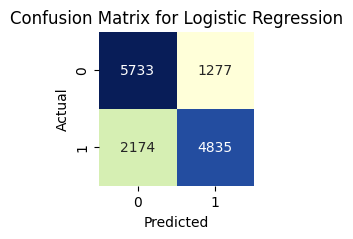

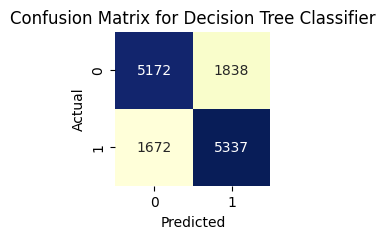

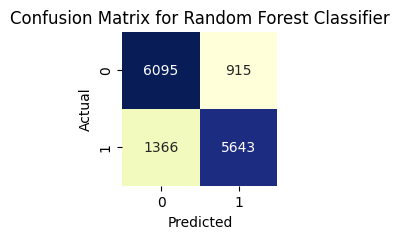

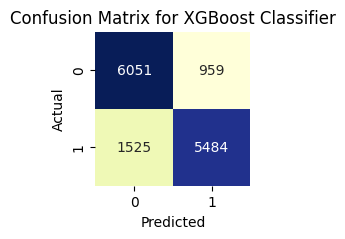

In [72]:

def plot_confusion_matrix(y_true, y_pred, labels, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(2,2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
    plt.title('Confusion Matrix for ' + model_name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(ticks=np.arange(len(labels))+0.5, labels=labels)
    plt.yticks(ticks=np.arange(len(labels))+0.5, labels=labels)
    plt.show()

# Plotting the confusion matrix and classification report for each model
plot_confusion_matrix(y_test, logreg_pred, labels=[0, 1], model_name = "Logistic Regression")
plot_confusion_matrix(y_test, dt_pred, labels=[0, 1], model_name = "Decision Tree Classifier")
plot_confusion_matrix(y_test, rf_pred, labels=[0, 1], model_name = "Random Forest Classifier")
plot_confusion_matrix(y_test, xgb_pred, labels=[0, 1], model_name = "XGBoost Classifier")

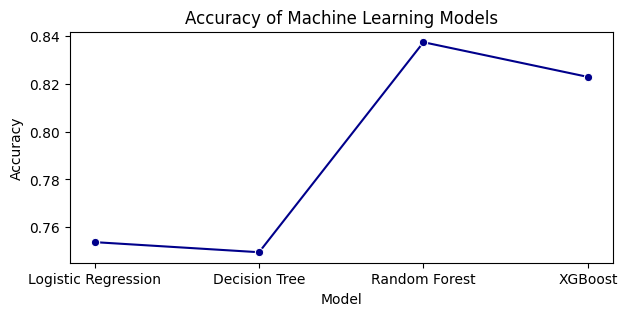

In [73]:
# Plotting the accuracies
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [logreg_accuracy, dt_accuracy, rf_accuracy, xgb_accuracy]

plt.figure(figsize=(7,3))
sns.lineplot(x=models, y=accuracies, marker='o', color='darkblue')
plt.title('Accuracy of Machine Learning Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

Confusion Matrix:
[[5739 1271]
 [2267 4742]]
Precision: 0.79
Recall: 0.68
Accuracy: 0.75


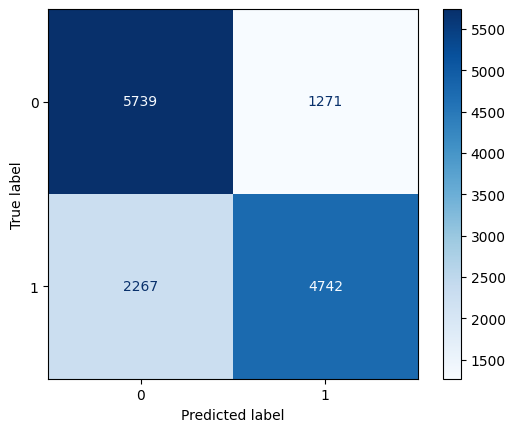

In [63]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt


# # cm = confusion_matrix(y_test, y_pred)
# # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# # disp.plot(cmap=plt.cm.Blues)
# # plt.show()
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# cm = confusion_matrix(y_test, y_pred)

# # Calculate precision, recall, and accuracy
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# accuracy = accuracy_score(y_test, y_pred)

# # Print confusion matrix and metrics
# print(f"Confusion Matrix:\n{cm}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"Accuracy: {accuracy:.2f}")

# # Display the confusion matrix using ConfusionMatrixDisplay
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(cmap='Blues')
# plt.show()


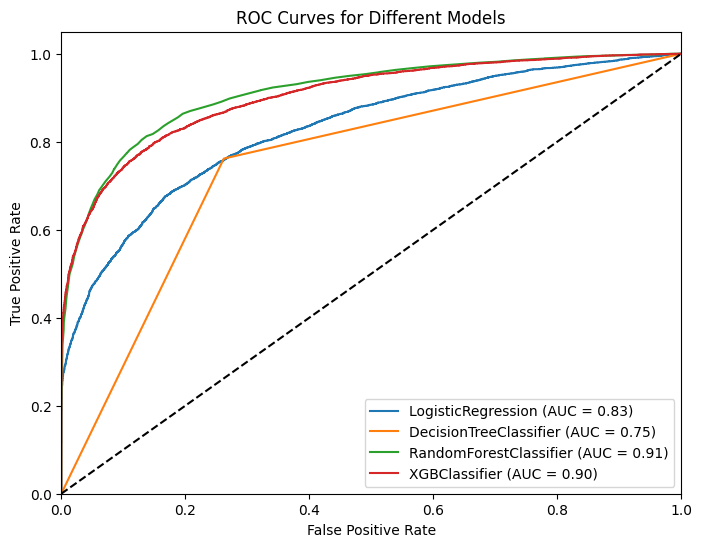

In [102]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

# Assuming logreg, dt, rf, and xgb_classifier are your models
models = [logreg, dt, rf, xgb_classifier]

plt.figure(figsize=(8, 6))

# Loop through each model and plot ROC curve
for model in models:
    plot_roc_curve(model, X_test, y_test)

# Plot the diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.show()
